# Initial setup

In [11]:
#importing packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#importing data
test_data = pd.read_table('test_rows.csv')
train_data = pd.read_table('train_rows.csv')
label_data = pd.read_table('test_rows_labels.csv')

# EDA
## Let's see how clean the data is.

### Train data

In [12]:
train_data_stats = train_data.describe()

In [13]:
train_data_stats

,RPA2_3,ZYG11A_4,F5_2,HOXC4_1,NKIRAS2_2,MEIS1_1,SAMD10_2,GRM2_9,TRIM59_5,LDB2_3,ELOVL2_6,DDO_1,KLF14_2,Age
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,63.089567,17.512548,38.266587,46.263413,24.298221,43.974471,34.801154,42.726875,44.744279,56.083654,56.316538,48.226058,3.003654,43.500000
std,7.595446,5.927233,6.271039,9.117746,4.192553,14.295283,6.073039,16.877749,8.248182,10.150657,10.932166,14.544547,1.740971,15.044539
min,43.780000,6.290000,23.580000,23.280000,12.070000,12.760000,18.220000,7.310000,25.260000,31.940000,31.830000,14.770000,0.480000,18.000000
25%,57.772500,13.257500,33.322500,39.392500,21.580000,33.810000,30.450000,29.285000,38.807500,48.732500,47.652500,38.922500,1.687500,30.750000
50%,62.980000,17.435000,37.985000,45.370000,24.100000,44.900000,34.635000,42.945000,44.410000,56.185000,57.110000,47.685000,2.525000,43.500000
75%,68.335000,21.022500,42.935000,53.232500,27.225000,53.210000,39.540000,56.040000,51.557500,62.750000,64.917500,57.192500,4.020000,56.250000
max,83.190000,40.820000,52.120000,69.470000,37.340000,79.270000,47.140000,81.170000,69.960000,78.730000,77.160000,88.090000,8.750000,69.000000


<AxesSubplot:>

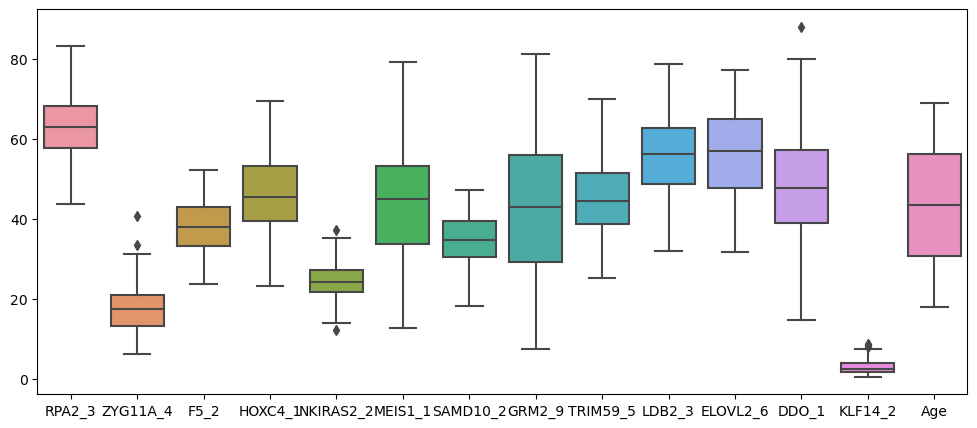

In [17]:
plt.figure(figsize = (12, 5))
sns.boxplot(data = train_data)

From the boxplot analysis, there are several outliers that can be detected in the results of ZYG11A_4, 1NKRAS2_2, DDO_1, KLF14_2. 

### Let's check for the distribution of these gene expression levels

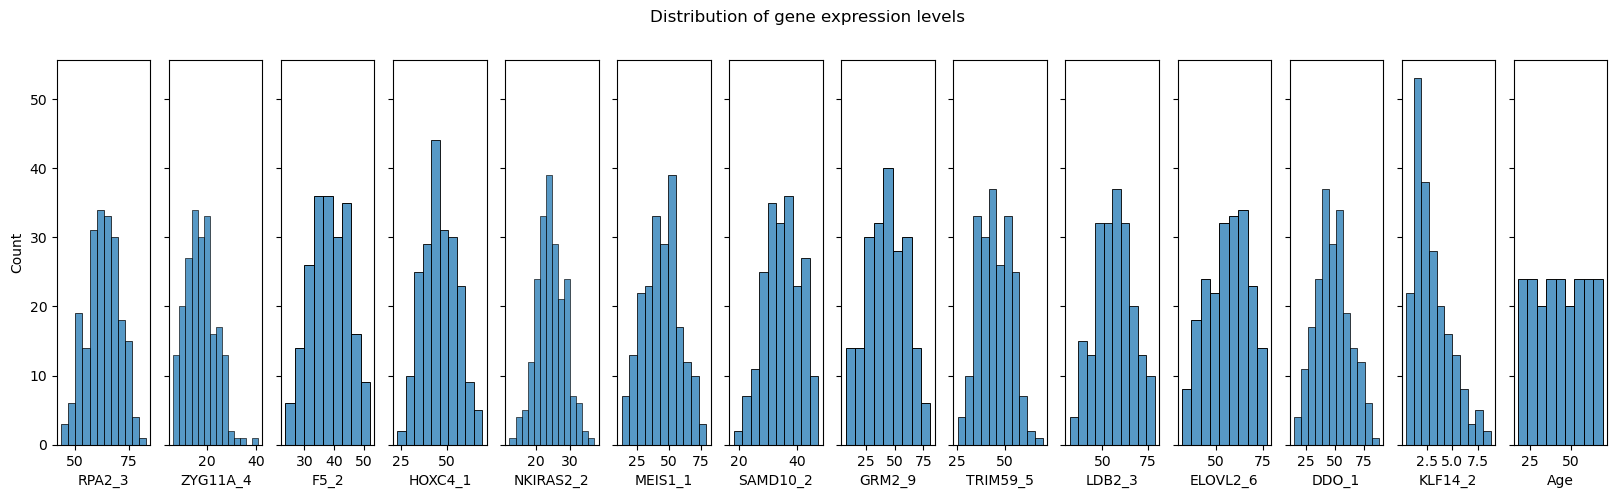

In [58]:
fig, axes = plt.subplots(1, 14, figsize = (20, 5), sharey = True)
fig.suptitle("Distribution of gene expression levels")

plot_num = 0
for x in train_data.columns:
    sns.histplot(ax = axes[plot_num], data = train_data[x])
    plot_num += 1

### Any missing values?

In [45]:
train_data.isnull().sum()

RPA2_3       0
ZYG11A_4     0
F5_2         0
HOXC4_1      0
NKIRAS2_2    0
MEIS1_1      0
SAMD10_2     0
GRM2_9       0
TRIM59_5     0
LDB2_3       0
ELOVL2_6     0
DDO_1        0
KLF14_2      0
Age          0
dtype: int64

### Great!!

However, we can see that not normal distributions are not common in this dataset. This is expected as the sample size is quite small. We will see if this train data can fit the models well.

### Correlation matrix of gene expression levels with Ages

<AxesSubplot:>

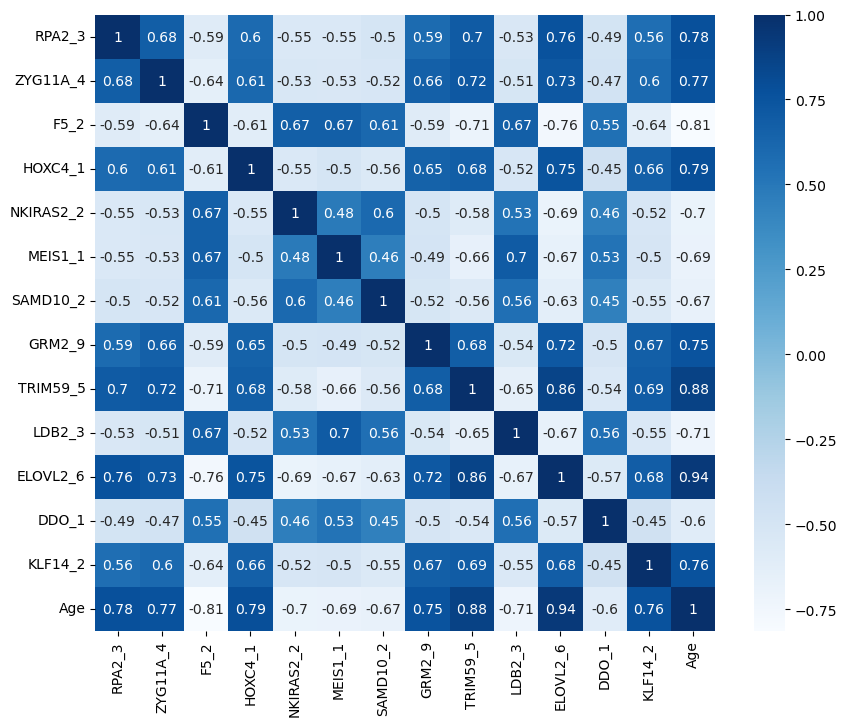

In [56]:
plt.figure(figsize = (10, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = "Blues")

*From this we can see that there are several genes with high correlation to ages (over 0.75), including: RPA2_3, ZYG11A_4, HOXC4_1, GRM2_9, TRIM59_5, ELOVL2_6 (the highest), KLF15_2